In [1]:
%pylab inline
import hmf
import haloSim
from configparser import ConfigParser
import astropy.table as astTab
from pixel3D import cartesianGrid3D
mMin=13.5;mMax=15
hmfun  =   hmf.MassFunction(Mmin=mMin,Mmax=mMax)
print(hmfun.parameter_values['cosmo_model'])

Populating the interactive namespace from numpy and matplotlib
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)


In [3]:
cd wrkDir/sim/

/work/xiangchong.li/work/massMapSparse/sim


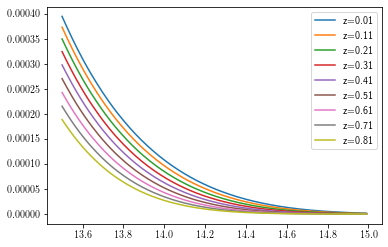

In [4]:
for iz in np.arange(0.01,0.86,0.1):
    hmfun.update(z=iz)
    plt.plot(np.log10(hmfun.m), hmfun.dndlog10m,label='z=%.2f'%iz)
plt.legend()

# Typical scale in each lens plane

In [5]:
lnm='nl20'
configName  =   'planck-cosmo/config-pix96-%s.ini' %lnm
parser      =   ConfigParser()
parser.read(configName)
gridInfo    =   cartesianGrid3D(parser)

In [ ]:
omega_m=0.315   # Planck 2018

log_m_array=np.linspace(13.3,15.0,8) # [M_solar/h]
z_array=gridInfo.zlcgrid
names=('iz','im','zh','log10_M200','conc','rs_arcmin')
data=[]
for iz,zh in enumerate(z_array):
    for im,logm in enumerate(log_m_array):
        z_h =   zh+np.random.uniform(-0.02,0.02)
        log_m=  logm+np.random.uniform(-0.05,0.05)

        M_200=  10.**(log_m) # in unit of M_solar/h
        conc =  6.02*(M_200/1.E13)**(-0.12)*(1.47/(1.+z_h))**(0.16)
        halo =  haloSim.nfw_lensTJ03(mass=M_200,conc=conc,redshift=z_h,\
                ra=0.,dec=0.,omega_m=omega_m)
        rs_amin=halo.rs_arcsec/60.
        print(halo.rs*(1+zh))
        #print(rs_amin)
        #data.append((iz,im,z_h,log_m,conc,rs_amin))

## If we fix the comoving distance

In [ ]:
for iz,zh in enumerate(z_array):
    print(np.round(0.25/halo.cosmo.Dc(0.,zh)*60*180./np.pi))
    print(0.25/(1+zh)/halo.cosmo.Da(0.,zh)*60*180./np.pi)

In [1]:
cd wrkDir/sim/

/work/xiangchong.li/work/massMapSparse/sim


In [2]:
%pylab inline
from configparser import ConfigParser
import halolet
lnm='nl20'
configName  =   'planck-cosmo/config-pix96-%s.ini' %lnm
parser      =   ConfigParser()
parser.read(configName)

Populating the interactive namespace from numpy and matplotlib


['planck-cosmo/config-pix96-nl20.ini']

In [3]:
hdict=halolet.nfwShearlet2D(parser)

In [4]:
hdict.rs_frame

array([[ 7.45302072, 14.90604144, 22.35906216],
       [ 3.19751816,  6.39503633,  9.59255449],
       [ 2.05105335,  4.10210671,  6.15316006],
       [ 0.        ,  3.03690961,  4.55536442],
       [ 0.        ,  2.42205392,  3.63308089],
       [ 0.        ,  2.02206385,  3.03309578],
       [-1.        ,  0.        ,  2.61187682],
       [-1.        ,  0.        ,  2.30008701],
       [-1.        ,  0.        ,  2.06012977],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ],
       [-1.        , -1.        ,  0.        ]])

In [5]:
hdict.rs_frame.shape

(20, 3)

In [7]:
data=np.zeros(hdict.shape3)
data[:,:,48,48]=1.

In [8]:
dataT=hdict.itransform(data,inFou=False,outFou=False)

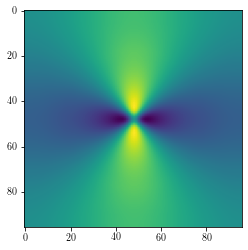

In [9]:
imshow(dataT[0].real)

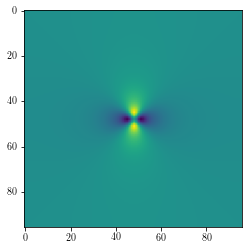

In [11]:
imshow(dataT[6].real)

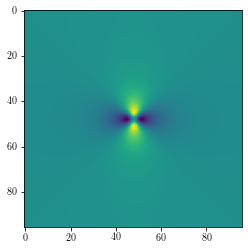

In [13]:
imshow(dataT[5].real)

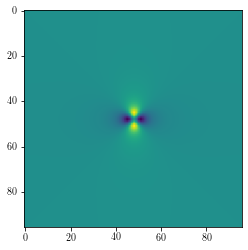

In [14]:
imshow(dataT[15].real)

In [12]:
data2=np.zeros(hdict.shape2)
data2[:,48,48]=1.

In [13]:
data2T=hdict.itranspose(data2,inFou=False,outFou=False)

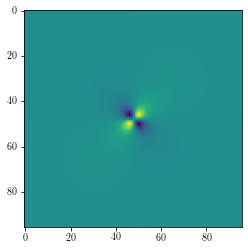

In [16]:
imshow(data2T[6,1].imag)

In [21]:
np.all(data2T[9]==data2T[11])

True